In [120]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math as m
from geopy import distance
from uszipcode import SearchEngine, Zipcode

In [7]:
#files csv
hubway_trips = pd.read_csv('hubway_trips.csv')
hubway_stations = pd.read_csv('hubway_stations.csv')


-----------------------------------------------------------------------------------------------------------------

## (Point 1)
## What's the average trip duration for annual members vs. casual users?

### Approach:

The choosen aproach for this exercise was seperating all annual member(Registered) from the Casual users and calculating the mean of each member group.

<IPython.core.display.Javascript object>


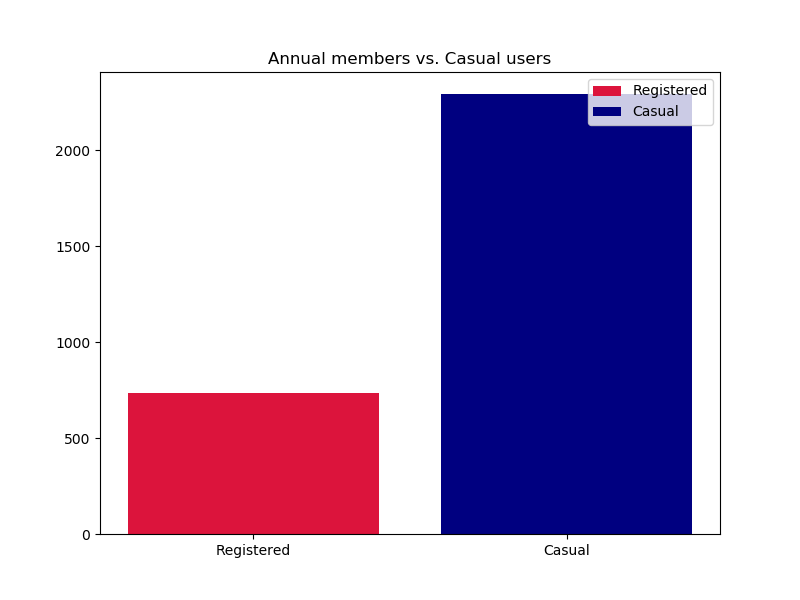

The average duration of the registered is: 12.222149725750638 minutes
The average duration of casual members is: 38.22403689292039 minutes


In [131]:
# Importing CSV file
hub_trips = hubway_trips.copy()

# Creating a DataFrame of all of those whom are registered as a member,
# these are the member who have a anual subscription.
duration_Registered = hub_trips[hub_trips['subsc_type'] == 'Registered']
reg_Mean = duration_Registered['duration'].mean();


# Crreating a DataFrame of all of those whom are NOT registered as a member,
# these are none as Casual member.
duration_Casual = hub_trips[hub_trips['subsc_type'] != 'Registered']
casual_Mean = duration_Casual['duration'].mean()

#PLOTING
plt.figure(figsize=(8,6))
plt.bar('Registered', reg_Mean,color = 'crimson', label= 'Registered')
plt.bar('Casual', casual_Mean,color = 'navy', label= 'Casual')
plt.title("Annual members vs. Casual users")
plt.legend(loc = 'upper right')
plt.show()

print("The average duration of the registered is: " + str(reg_Mean/60) + " minutes");
print("The average duration of casual members is: " + str(casual_Mean/60) + " minutes")


### Analysis:

    The graph demonstrates the average duration of each trip but separated in Registered and Casual member group. On the plot,the y-axis represents  the duration time in seconds and the x-axis the member groups.

# ----------------------------------------------------------------------------------------------------------

## (Point 2)
## What are the peak Hubway hours?

### Approach:
To solve this exercise, the first thing we did was to make a split in the start_date column, in this way we obtained 2 values (hours and dates). We created a new column with only the hours and we gave it a format so that it would only give me the whole number of the hour, since 10:10 and 10:50 are still 10.

With the time in the proper format, we can use a panda function (value_counts) that counts the frequency at which a value is repeated. If an hour repeats a lot, it is because it is the hour where more people go. In this way we obtained the value we wanted to look for.


<IPython.core.display.Javascript object>


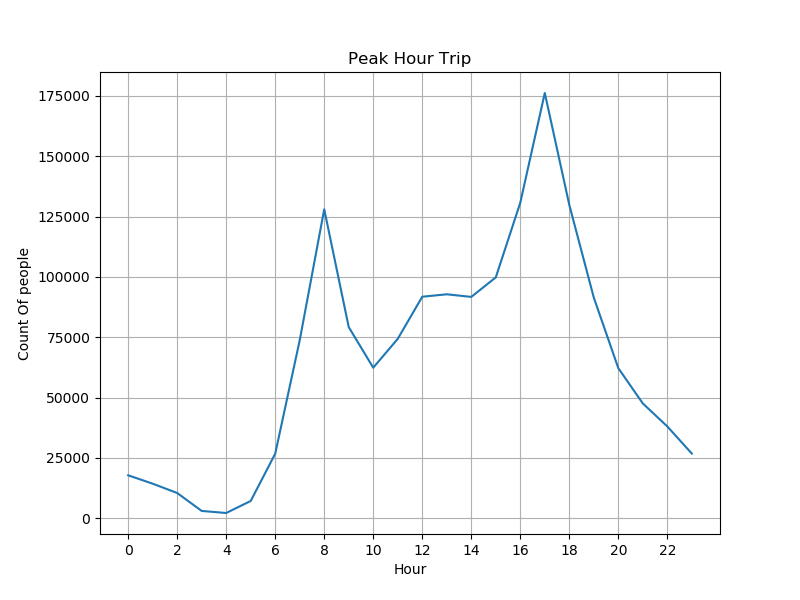

In [132]:
#get the start_date
time = hubway_trips[['start_date']]

#Start data
fhour = time['start_date'].str.split(" ", expand=True)

# Just get the hour without the date
hubway_trips['hour'] = fhour[1]

# #transfor the hour format (H:M:S) into just this (H).
hubway_trips['hour'] = pd.to_datetime(hubway_trips['hour'], format='%H:%M:%S').dt.hour

#count how many times unique values repeat
hour_freq = hubway_trips['hour'].value_counts().reset_index().sort_values(by='index')

#change the columns name
hour_freq.columns = ['hour', 'count_frequencies']
plt.figure(figsize=(8,6))
plt.xlabel('Hour')
plt.ylabel('Count Of people')
plt.title('Peak Hour Trip')
plt.grid(True)
plt.xticks(range(0, 24, 2))
plt.plot(hour_freq['hour'], hour_freq['count_frequencies'])
plt.show()


### Analysis:   
5pm is the time in which we have more people activity, however, it is not the only one, we can see in the plot another peak, witch is when the time is 8am. Taking into account these 2 peaks, we can say that the activity of hubway is greater when people go to work and to get out of the work.

# ------------------------------------------------------------------------------------------------------------

## (Point 3)
## Which days of the week get the most Hubway traffic?

### Approach:

To be able to take the days in which the activity of people is greater in the hubway, we must have the days and their respective names. For this we convert the column of 'end_date' into a datetime type of pandas. NOTE (TO DO THIS STEP TAKES ME 10 MITS). Now with the 'end_date' column in the desired format, now we can search for the year, month and the day from the end_date column. let's create a new column 'day_name' that contains the name of the days in the end_date column.

Since we have the name of the days, we can group the values by days and count the frequency in which those days are repeated in 'end_statn'. The groupby returns a dataframe that contains as index the days of the week, and as a value the times that day is repeated.

In the same way, to get the time in which more people take the hubway, we filter the dataframe to get the day with more activity and then search for the frequency of the column 'hour'. 


===============================Day count trip=============================
           end_statn
day_name            
Monday        230544
Tuesday       231782
Wednesday     238611
Thursday      234851
Friday        230901
Saturday      215587
Sunday        196704
========================MAX Hour is 5pm=============================
    Hour   trips
17    17  176580


<IPython.core.display.Javascript object>


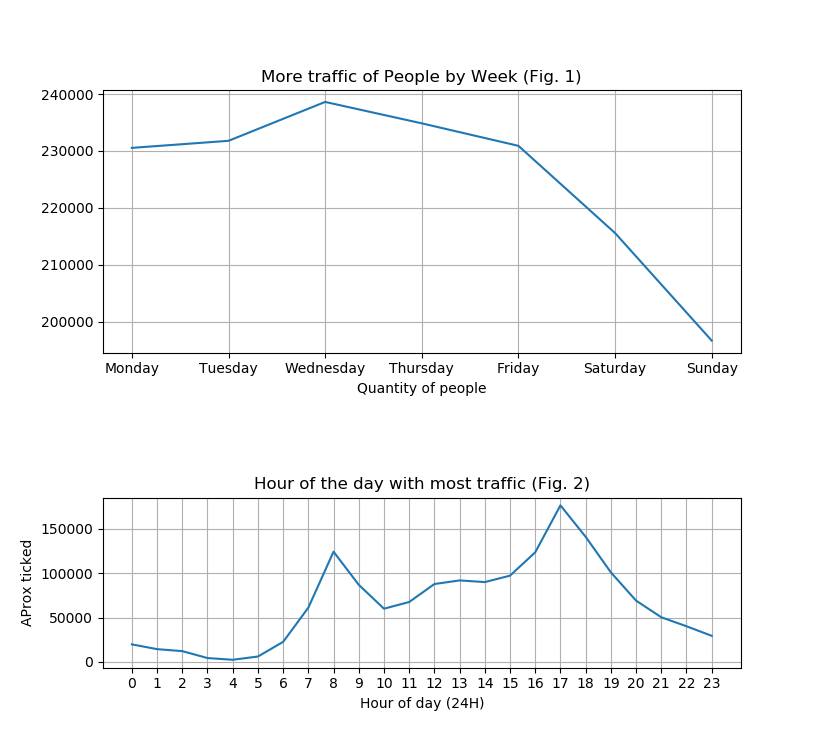

In [134]:
#creating a new df hubway 
weekTrafic = hubway_trips

#Conver the column end_date to a pandas date_time
weekTrafic['end_date'] = pd.to_datetime(weekTrafic['end_date'])

#to manipule the date, we change the tipy to slice some values
date_day = weekTrafic['end_date'].astype(str)

#the just the firt 10 char from the column end_date (we get the date without hour)
weekTrafic['day_name'] = date_day.str.slice(stop=10)

#Convert the type again into a datetime
weekTrafic['day_name'] = pd.to_datetime(weekTrafic['day_name'])

#Transfonr the string column day_name into a column with the day_name insted of date format
weekTrafic['day_name'] = weekTrafic['day_name'].dt.day_name()

#list days
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#group the day_name, then count how many people end the destination in the station
days_count_trips = weekTrafic.groupby('day_name')[['end_statn']].count().reindex(days) 

#see how we got the date format. We got the day, and the count of people end the travel there
print('===============================Day count trip=============================')
print(days_count_trips.iloc[:])

#Create a new column with hour
weekTrafic['hour'] = weekTrafic['end_date'].dt.hour 

#to get what was the peek hour by the day, we group the column hour by hudway_id, then count it
peek_hours = weekTrafic.groupby('hour')['hubway_id'].count().reset_index()

#changin the name of our columns
peek_hours.columns = ['Hour', 'trips']

print('========================MAX Hour is 5pm=============================')
#print in what hour we get more people in the station
print(peek_hours[peek_hours['trips'] == peek_hours['trips'].max()])

#Plt of the day with more traffic
plt.subplot(2, 1, 1)
plt.plot(days_count_trips)
plt.title("More traffic of People by Week (Fig. 1)")
plt.xlabel("Day of Week")
plt.grid(True)
plt.xlabel("Quantity of people")
plt.show()

plt.subplot(3, 1, 3)
#Plot of the hour of the day with more traffic
plt.plot(peek_hours.Hour,peek_hours.trips)
plt.title("Hour of the day with most traffic (Fig. 2)")
plt.xlabel("Hour of day (24H)")
plt.ylabel("AProx ticked")
plt.grid(True)
plt.xticks(range(0,24))
plt.show()


### Analysis:    
    
In the figure 1 we can find the days that have more traffic of people. The Wednesday is the day with more traffic. it make sence because this day is in the middle of the week. In the same way, in the Fig 2 we found the peek hours for the day with more trafict. We can appreciate that the Peek our is 5pm, where people get out of the work or where people have more free time. The wednesday have 2 peek hours: 8am and 5pm, the time where we got more people rental the hubway. 

# ------------------------------------------------------------------------------------------------------------

# (Point 4)
## Which stations are most popular?

### Approach:

to get the most popular stations we group the values of the column 'strt_statn' which is the one that contains the id of the stations, and we counted how many tikects there were per station. We did the same with the column 'end_statn'
    
The groupby returns a dataframe with the 'id' of the stations and the frequency in which that station is repeated.

<IPython.core.display.Javascript object>


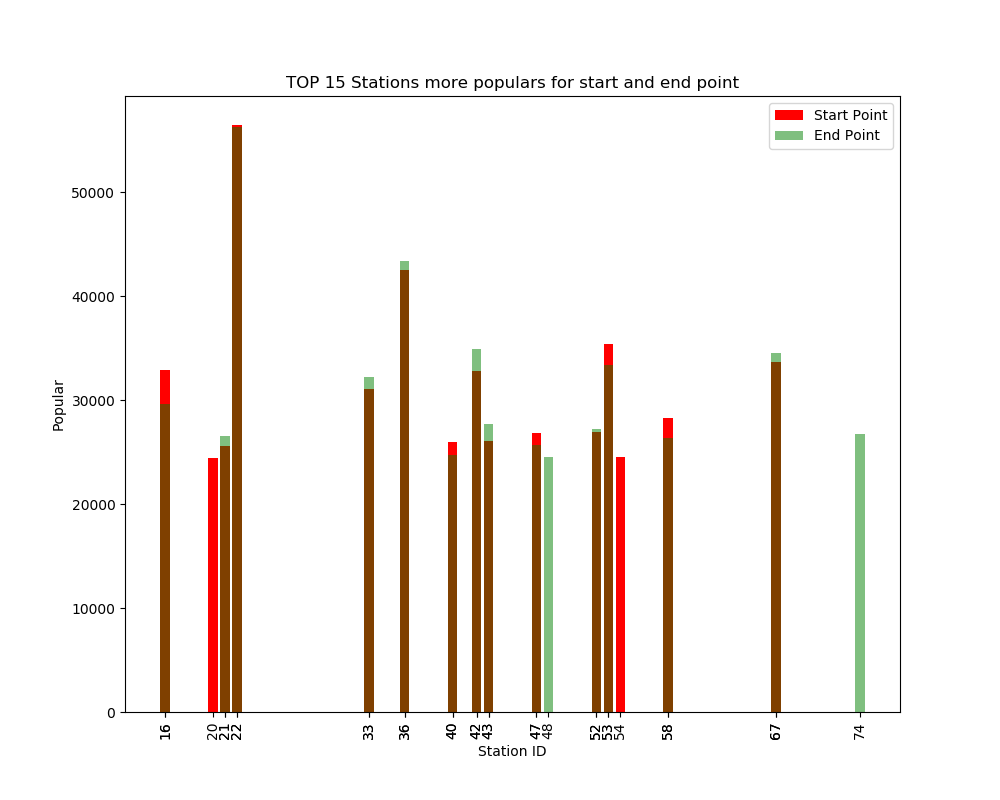

In [11]:
#Where people start to moving
star_station = hubway_trips.groupby('strt_statn')[['hubway_id']].count()\
.reset_index().sort_values(by='hubway_id', ascending=False)

#where the pople end the destination
end_station = hubway_trips.groupby('end_statn')[['hubway_id']].count()\
.reset_index().sort_values(by='hubway_id', ascending=False)

xpoinst = list(end_station.end_statn[:15])+ list(star_station['strt_statn'][:15])
plt.figure(figsize=(10,8))
plt.bar(star_station['strt_statn'][:15], star_station['hubway_id'][:15], width=0.8, color='red')
plt.bar(end_station.end_statn[:15], end_station.hubway_id[:15],alpha=0.5, width=0.8, color='green')
plt.xlabel("Station ID")
plt.ylabel("Popular")
plt.title("TOP 15 Stations more populars for start and end point")
plt.legend(["Start Point", "End Point"])
plt.xticks(xpoinst, rotation=90)
plt.show()

### Analysis:    
    
In the plot above we can apreciate that the station with more flow of people is the station 22, with nearle 60k trips. in the same line, the stations 22 is the most popular no just for staring point, It is also the most popular for arrivals.

The station 36 is the next one more popular for starting and end point. 

When a color is more close to another color in the same stations means that the stations is popular for start and end point. 

## Which stations make up the most popular origin/destination pairs?

### Approach:
To get the pair of the stations most popular for origin/destination, we convert the columns 'strt_statn, end_statn' into a string type, then we concatenate these columns to get a pair. With the pair, we can search for te frequency of that of the values, means that find the frequency of our concatenated value. The pair with the higther frequency is the pair we want to.

<IPython.core.display.Javascript object>


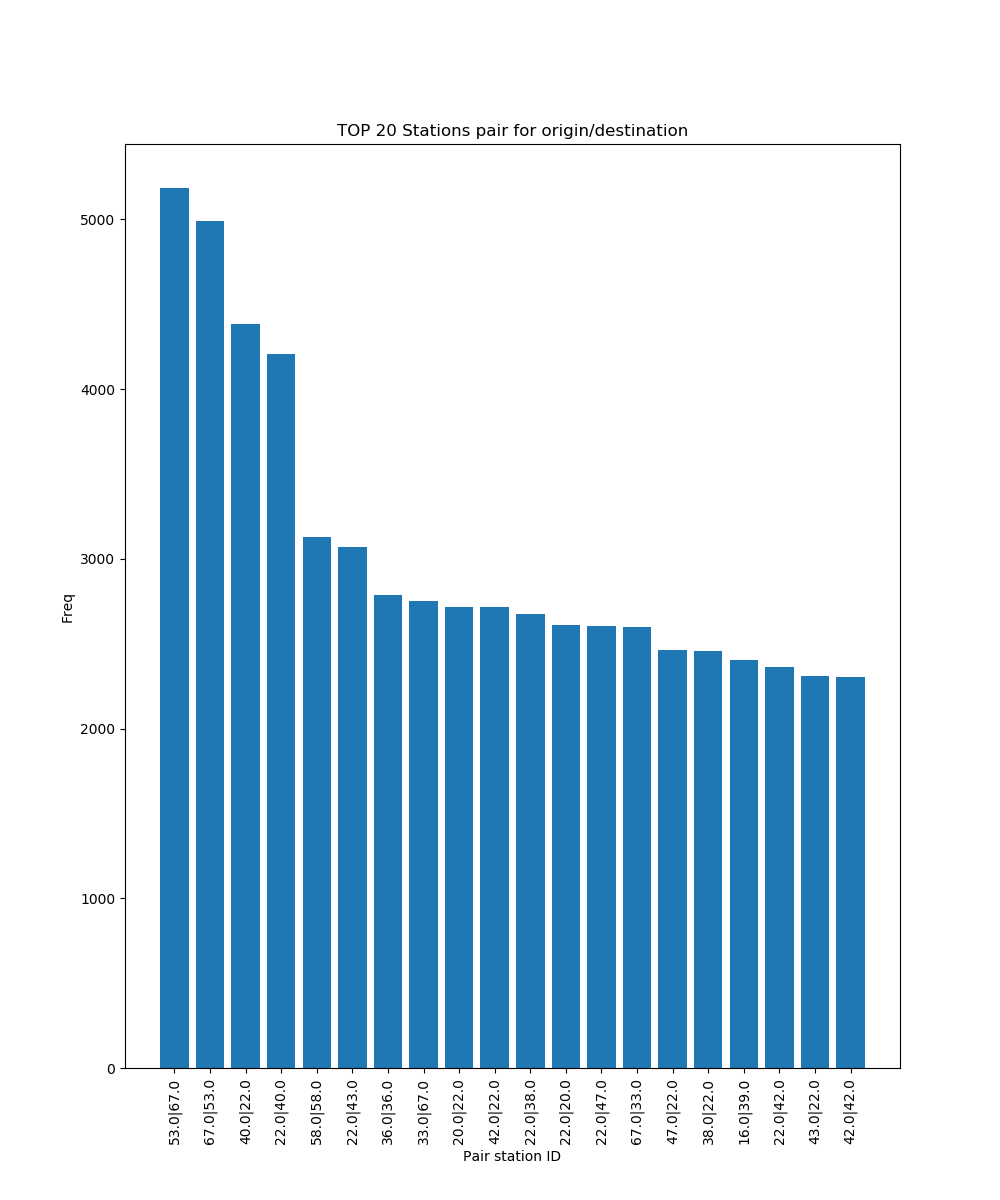

In [93]:
#created a copy but delete nan values
srt_concat = hubway_trips.copy()

#convert the columns strt_statn,end_statn from int to string to concatenate
srt_concat['strt_statn'] = srt_concat['strt_statn'].astype(str) + '|' 
srt_concat['end_statn'] = srt_concat['end_statn'].astype(str)

#concatenating the string
str_ = srt_concat['strt_statn'] + srt_concat['end_statn']
str_ = str_.value_counts().reset_index()

# naming the column of the dataframe
str_.columns = ['pair', 'freq']

#PLOTING
plt.figure(figsize=(10,12))
plt.bar(str_['pair'][:20], str_['freq'][:20])
plt.xticks(rotation=90)
plt.xlabel("Pair station ID")
plt.ylabel("Freq")
plt.title("TOP 20 Stations pair for origin/destination")
plt.show()

### Analysis:
   The plot above shows the stations pair with more traffict for start and end points. Its mean that the station with the ID 53 and 67 is the stations more popular for the people. More people Start in the stations 53 and end in the stations 67. The others labels of the plot means the same. The stations 67 and 53 are the second most popular for start/destination pair. 

# ------------------------------------------------------------------------------------------------------------

## (Point 5)
## Which stations are the most asymmetric - more trips start there than end there, or vice versa?

### Approach:

    
   The way I found the result that i was looking for took a couple steps. First, I found the frequencies of each starting station and end station. After generating the frequencies I save them into numpy arrays and calculate the difference for each frequencies for each station and save them into another numpy array.  Then I took a dataframe which contained two columns (Stations, Frequencies) and made a copy. To the copy I replaced the frequencies values with the difference values to their respective station to create a data frame containing a Station column and Difference column. After having this data frame, I used the array contains all of the difference and found the max. With the max value I simply matched the value with the one Station the has that value. Thus I found the most asymmetric station.



------------- Start Stations ------------

   Stations  Frequencies
0       3.0         9734
1       4.0        18058
2       5.0        10630
3       6.0        23322
4       7.0         9163

-------------- End Stations -------------

   Stations  Frequencies
0       3.0         9260
1       4.0        17472
2       5.0        11058
3       6.0        22655
4       7.0         8883

-----------------------------------------


Difference Between Start and End Frequencies

   Stations  Difference
0       3.0         474
1       4.0         586
2       5.0         428
3       6.0         667
4       7.0         280

The Most Asymmetric Station is Station 16.0
Name: Stations, dtype: float64

With the value of: 3195




<IPython.core.display.Javascript object>


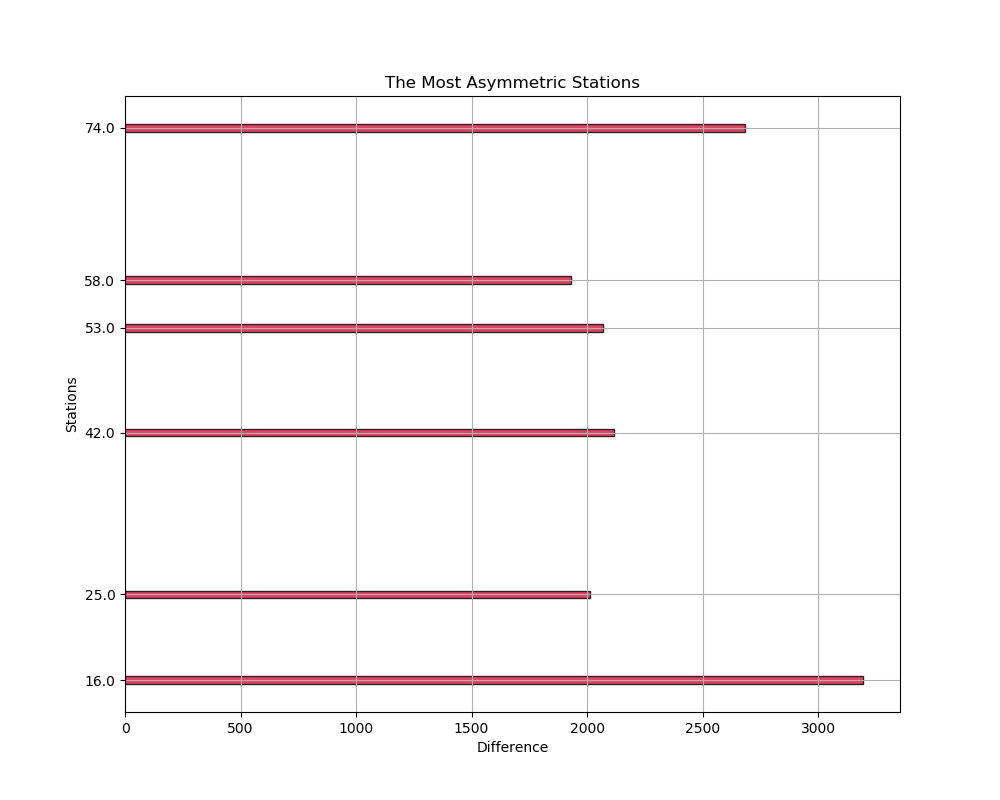

In [13]:
# Using the "groupby()" and "size()" methods to find the frequencies  for each Starting Stations
hubway_start = hubway_trips.groupby('strt_statn').size()
hubway_start = hubway_start.reset_index()
hubway_start.columns = ['Stations', 'Frequencies']

# Using the "groupby()" and "size()" methods to find the frequencies  for each End Stations
hubway_end = hubway_trips.groupby('end_statn').size()
hubway_end = hubway_end.reset_index()
hubway_end.columns = ['Stations', 'Frequencies']

# Saving frequencies values to a numpy array
start_array = np.array(hubway_start['Frequencies'])
end_array = np.array(hubway_end['Frequencies'])

# Calculating the difference to find the  most asymmetric stations
diff_array = abs(start_array - end_array)

# Using the numpy "amax()" function to find the max values within the array
diff_max = np.amax(diff_array)

# Made a copy of the 'hubway_start' Dataframe 
#then subtitute the frequencies vales with the 'diff_array' values
df_diff = hubway_start.copy()
df_diff['Frequencies'] = diff_array

# Renaming the columns 
df_diff.columns = ['Stations', 'Difference']

# Finding the most asymmmetric Station
asy_station = dict(df_diff[df_diff['Difference'] == diff_max])
station = str(asy_station['Stations'])

print('\n------------- Start Stations ------------\n')
print(hubway_start.head())
print('\n-------------- End Stations -------------\n')
print(hubway_end.head())
print('\n-----------------------------------------\n')
print('\nDifference Between Start and End Frequencies\n')
print(df_diff.head())
print('\nThe Most Asymmetric Station is Station ' + station[6:] + '\n')
print('With the value of: ' + str(diff_max) + '\n')
print("===================================================\n")

# Choosing all station with a difference higher than 1800
plot_diff = df_diff[df_diff['Difference'] > 1800]

# This makes the graph bigger
plt.figure(figsize=(10,8))

# Ploting hubway_start['Stations'] vs hubway_['Frequencies'] using bar graph,
# ['Difference'] being my Y axis and ['Stations'] my X axis
plt.barh(plot_diff['Stations'], plot_diff['Difference'], color= 'crimson', alpha= 0.8, edgecolor= 'black')

plt.title("The Most Asymmetric Stations"); 
plt.xlabel("Difference"); plt.ylabel("Stations")
plt.yticks(plot_diff['Stations'], plot_diff['Stations'])

plt.grid(True)
plt.show()

### Analysis:

   On the graph the y-axis are the station and x-axis are the difference values. The station 16 has the highest difference between Start Station frequency and End Station frequencies. This mean its the most asymmetric station out of the top 6 asymmetric stations.

## Are they all at the top of hills?

### Aproach:

   By mergin the plot_diff data frame with the hubway_stations data frame by the station id's, I was able to get the mot asymmetric stations longitud and lattitude coordinates. After getting those value I would plot them with all the other station but having them identify with another color to see their location.

<IPython.core.display.Javascript object>


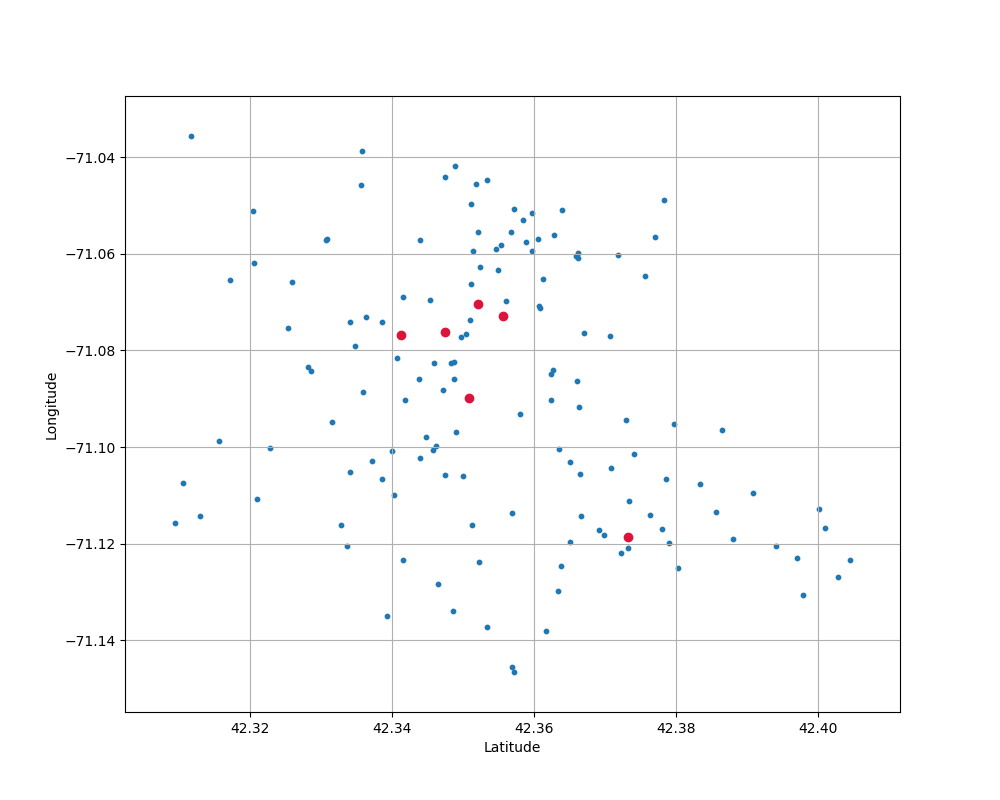

,Stations,Difference,id,terminal,station,municipal,lat,lng,status
0,16.0,3195,16,C32003,Back Bay / South End Station,Boston,42.347433,-71.076163,Existing
1,25.0,2014,25,A32009,Tremont St / W Newton St,Boston,42.341332,-71.076847,Existing
2,42.0,2118,42,D32007,Boylston St. at Arlington St.,Boston,42.352096,-71.070378,Existing
3,53.0,2071,53,B32016,Beacon St / Mass Ave,Boston,42.350851,-71.089886,Existing
4,58.0,1929,58,D32017,The Esplanade - Beacon St. at Arlington St.,Boston,42.355596,-71.072780,Existing
5,74.0,2685,74,M32018,Harvard Square at Mass Ave/ Dunster,Cambridge,42.373268,-71.118579,Existing


In [27]:
diff_merge = plot_diff.copy()
diff_merge['id'] = diff_merge['Stations'].astype(int).copy()

# Merging diff_merge with hubway_station
merge_diff = pd.merge(diff_merge, hubway_stations, on='id')

# Using scatter plot t plot the lattitud and longitude coordinates
plt.figure(figsize=(10,8))
plt.scatter(hubway_stations.lat, hubway_stations.lng, s = 10)
plt.scatter(merge_diff.lat, merge_diff.lng, color='crimson')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid()
plt.show()

merge_diff

### Analysis: 

   The way that we interpret the question, we assume that the station are not at the top of the hill do to their location being in the center of the graph and not the other border.

# ---------------------------------------------------------------------------------------------------------

## (Point 6)

## What does a year in the life of one Hubway bike look like?

### Approach:

To get the life of a hubway in a year we need the year & montn. with this 2 attributes we can filter our dataframe to select the year of the bike. After filtering the data, we make a merge with the dataframe hubway_stations to mix our data and thus be able to have the id of the station with its respective latitude and longitude. This step of combining our dataframe with hubway stations we do 2 times to get the lat, lgn of the stations where the trip begins, and then we do it again to get the lat, lgn of the stations where the trip ends. At the end we will obtain a dataframe that has the columns of lat, lng of the stations where the trip starts and the lat, lgn of the stations where the trip ends.

With these values, we can calculate the approximate distance made by each trip. To calculate the distance we created a function 'calculate_dist' that takes the points of lat, lng and transforms them into distance, we save those distance values in a list and insert them in our dataframe.

Now we have a column in our dataframe that tells us the approximate distance between the start_stations and the end_stations, that is, the distance between each trip.

The key values to determine this exercise were:
    Duration per month of the use of all bikes in one year
    Amount of bikes used in a year
    Distance traveled between all bikes in a year. 
    
To obtain the duration of each trip in a full year, we first filter the dataframe per year.
 
Since our dataframe has all the data we want, we can perform a groupby to get the values we want (Values: year, month, lat_start, lgn_start, lat_end, lng_end, duration, hubway_id)


*We group month to get the sum duration of every month. variable = 'month_duration_by_year'

*We group month to get the count of bike used every month. variable = 'bike_use_by_month'

*We grouped month to get the sum of distance traveled for the bikes every month. variable = 'dist_by_month'


In [121]:

#Selecting the year
selected_year = '2012'

###########################################
def calculate_dist(r1, r2, r3, r4):
    """ Function to calculate distance bedtween points """
    
    #Radius of the EARTH APROX
    R = 6373.0

    dlon = r4 - r2
    dlat = r3 - r1

    a = m.sin(dlat / 2)**2 + m.cos(r1) * m.cos(r3) * m.sin(dlon / 2)**2
    c = 2 * m.atan2(m.sqrt(a), m.sqrt(1 - a))

    distance = R * c
    
    return distance
#########################################                  

#Generate bike dataframe
df_bike_life = hubway_trips

#transfor the end_date to a string for slice
bike_life_str = bike_life['end_date'].astype(str)

#create 2 new columns ['Year', 'month'] with the respective values
df_bike_life['year'] = bike_life_str.str.slice(stop=4)
df_bike_life['month'] = bike_life_str.str.slice(start = 5,stop=7)

#FILTERING THE DATAFRAME TO GET JUST THE DATA FROM A YEAR
year_bike = bike_life[bike_life.year == selected_year].copy()

#Make a copy and DROP unnecessary columns
df_distance = year_bike.drop(['status', 'subsc_type', 'birth_date', 'gender',
                                 'start_date', 'end_date'], axis=1).copy().fillna(0)

#convert the columns strt_statn and end to a int type
df_distance[['strt_statn', 'end_statn']] = df_distance[['strt_statn', 'end_statn']].astype(int) 

#create a column with the id_start to know the lat and long for the start trips
df_distance['id_start'] = df_distance['strt_statn']

#Adding these new column in the dataframe of hubway_stations
hubway_stations['id_start'] =  hubway_stations['id']
hubway_stations['id_end'] =  hubway_stations['id']

#mergin the dataframe distance, with the hubway stations to get the lat, lgn of the stations
#where the people start their trip.
df_ = pd.merge(df_distance, hubway_stations[['id_start','lat','lng']], on='id_start')

#here we are creating 2 new rows with the lat, lgn of the starting point stations
df_['lat_start'], df_['lng_start'] = df_['lat'], df_['lng'] 

#drop repeated columns 
df_ = df_.drop(['lat', 'lng'], axis=1)

#coping the column end_statn to a new column with the id_end for name
df_['id_end'] = df_['end_statn']

#merging the dataframe above, who now got the lat, lgn for the starting point stations with
#hubway stations to get the lat, lng of the end_stations
df_points = pd.merge(df_, hubway_stations[['id_end','lat','lng']], on='id_end')
df_points['lat_end'], df_points['lng_end'] = df_points['lat'], df_points['lng'] 

#drop repeated columns 
df_points = df_points.drop(['lat', 'lng'], axis=1)

#store the lat, log of the star_stations into a numpy array
lat_lng_start = np.array(df_points.loc[:, ['lat_start', 'lng_start']].copy())

#store the lat, log of the end_stations into a numpy array
lat_lng_end = np.array(df_points.loc[:, ['lat_end', 'lng_end']].copy())

#to calculate distance, we must conver those value in radians.
#lat_lng_start: store the lat, lgn of the start stations, where people start taking the hubway
latlng_start_R = np.radians(lat_lng_start)

#lat_lng_end: store the lat, lgn of the ends stations, where people end their destination from  the hubway
latlng_end_R = np.radians(lat_lng_end)

#store the points using list compreh. for better iteration.
lat1 = [x[0] for x in latlng_start_R]
lng1 = [x[1] for x in latlng_start_R]
lat2 = [x[0] for x in latlng_end_R]
lng2 = [x[1] for x in latlng_end_R]

#list to store the distance
list_distace = []

#Loop to get the distance bedtween all pair of points
for i in range(len(lat1)):
    list_distace.append(calculate_dist(lat1[i], lng1[i], lat2[i], lng2[i]))

#create a new column name distance, whats values are the distance bedtween the start_stations and end_stations
#this way we got the distance that the user traveled.
df_points['distance'] = list_distace

#what was the duration for a bike by month in a year
month_duration_by_year = df_points.groupby('month')['duration'].sum().reset_index()

#how many times a bike was used by month in a year
bike_use_by_month = df_points.groupby('month')['strt_statn'].count().reset_index()

#what was the distance travaled for a bike by month in  year
dist_by_month =  round(df_points.groupby('month')['distance'].sum().reset_index())

#transfor the duration in seconds, into a duration in hours.
month_duration_by_year['duration'] = round(month_duration_by_year['duration'] / 3600)


<IPython.core.display.Javascript object>


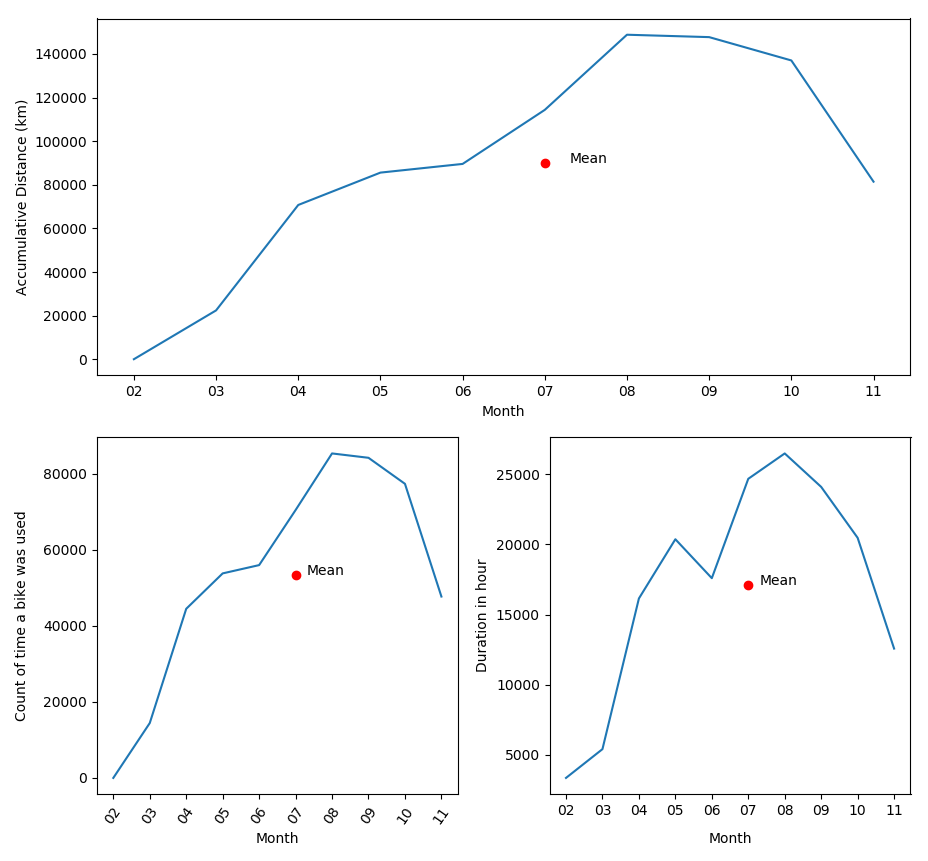

Mean Distance Traveled by bikes in a year 89767.6 km
Mean of the time a bike was used in a year 53379
Mean Duration by bikes in a year 17117.2


In [126]:
#PLOTING

#ALl plot have the same index
month_axis = dist_by_month.month

duration_year_mean = month_duration_by_year['duration'].mean()
distance_year_mean = dist_by_month['distance'].mean()
anual_use_bike_mean = bike_use_by_month['strt_statn'].mean()


fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(month_axis, dist_by_month['distance'])
ax.scatter(len(month_axis) / 2, distance_year_mean, color='red' )
ax.text(len(month_axis) / 2 + 0.3, distance_year_mean, 'Mean' )

ax.set_ylabel('Accumulative Distance (km)')
ax.set_xlabel('Month')

for i in range(2):
    ax = fig.add_subplot(gs[1, i])
    if i == 0:
        ax.plot(month_axis, bike_use_by_month.strt_statn)
        ax.set_ylabel('Count of time a bike was used')
        ax.set_xlabel('Month') 
        ax.scatter(len(month_axis) / 2, anual_use_bike_mean, color='red' )
        ax.text(len(month_axis) / 2 + 0.3,anual_use_bike_mean, 'Mean' )

    else:
        ax.plot(month_axis, month_duration_by_year.duration)
        ax.set_ylabel('Duration in hour')
        ax.set_xlabel('Month') 
        ax.scatter(len(month_axis) / 2,  duration_year_mean, color='red' )
        ax.text(len(month_axis) / 2 + 0.3 , duration_year_mean, 'Mean' )

     
        
    if i == 0:
        for tick in ax.get_xticklabels():
            tick.set_rotation(55)

fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

plt.show()

#print
print("Mean Distance Traveled by bikes in a year",distance_year_mean, "km" )
print("Mean of the time a bike was used in a year", round(anual_use_bike_mean))
print("Mean Duration by bikes in a year", duration_year_mean)


### Analysis:    
    
plot 1) The first graph shows us the cumulative distance of each month, that is, the distance traveled by each bike in a month throughout the year.

plot 2) It shows us how many bikes were used per month as the year passed.

plot 3) It shows the duration in cumulative HOURS of each month.
 
The 3 plots have a pattern easy to observe, they all start climbing and at the end of the year they fall. If we take the 2nd plot as the starting point, we can observe that the number of people increases in the middle of the year, after that its going decreases. We can see that the 2 other graphs follow the same pattern. It makes sense since more people, more use, therefore greater distance traveled and more time of use.
 

# ------------------------------------------------------------------------------------------------------------

## (Point 7)
## Which stations get the most tourist traffic, and which get the most commuters?

### Approach:

as Point 1, we search for the register & Casual. Then group both by stations and find the most populars. Finish plot it and compare. 

========================TOURIST STATION & COUNT OF TICKETS==========================
    station_id  count_hubway_id
32        36.0            17549
38        42.0            15689
54        58.0            12956
70        74.0            11932
49        53.0            11257
========================COMMUTESRT STATION & COUNT OF TICKETS==========================
    station_id  count_hubway_id
19        22.0            46156
13        16.0            27090
32        36.0            25022
63        67.0            24274
49        53.0            24183


<IPython.core.display.Javascript object>


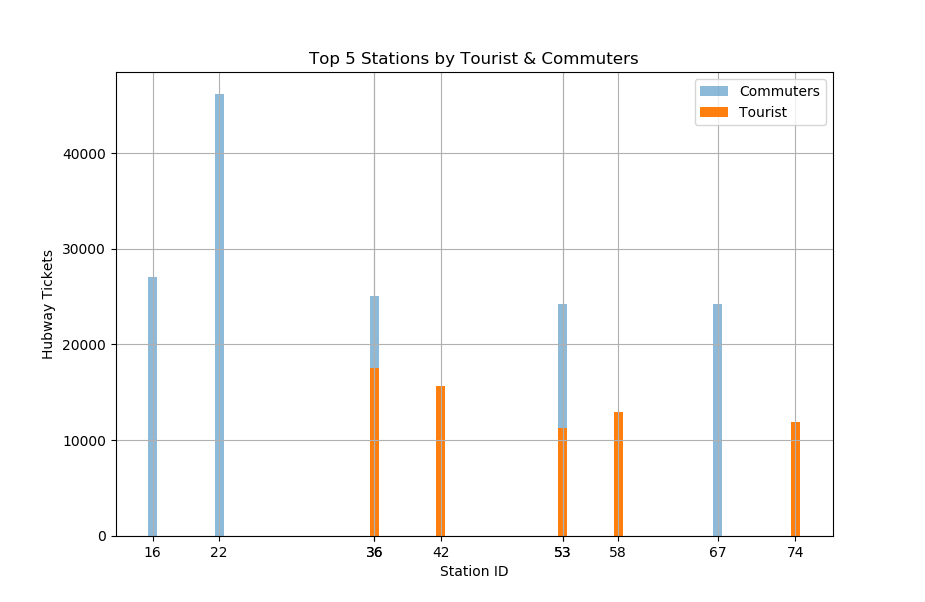

In [135]:
#Commuters
register = hubway_trips[hubway_trips.subsc_type == 'Registered']

#Tourist
casual = hubway_trips[hubway_trips.subsc_type == 'Casual'].drop(columns=['zip_code', 'birth_date', 'gender'])

#t
casual_stations = casual.groupby('strt_statn')['hubway_id'].count().reset_index().sort_values(
    by='hubway_id', ascending = False)

register_stations = register.groupby('strt_statn')['hubway_id'].count().reset_index().sort_values(
    by='hubway_id', ascending = False)

casual_stations.columns = ['station_id', 'count_hubway_id']
register_stations.columns = ['station_id', 'count_hubway_id']

print("========================TOURIST STATION & COUNT OF TICKETS==========================")
print(casual_stations.head())

print("========================COMMUTESRT STATION & COUNT OF TICKETS==========================")
print(register_stations.head())

#Tourist AXIS AND Y
x1 = casual_stations.station_id.head()
y1 = casual_stations.count_hubway_id.head()

#Commuters AXIS AND Y
y2 = register_stations.count_hubway_id.head()
x2 = register_stations.station_id.head()

#Get the index of for de x label
indx1 = list(x1)
indx2 = list(x2)

#Legend
lgend = ['Commuters', 'Tourist']

#Plot
plt.title('Top 5 Stations by Tourist & Commuters')
plt.bar(x2, y2, alpha=0.5)
plt.bar(x1, y1)
plt.legend(lgend)
plt.ylabel("Hubway Tickets")
plt.xlabel("Station ID")
plt.xticks(indx1 + indx2)
plt.grid(True)
plt.show()

### Analysis:    
    
In the graph above you can find which stations are used by the users who are registered vs the users that are causal or tourists. We can see that there are stations in which it is very popular for registered users as it is for tourists. We can also say that the most popular station for commuters is not the same most popular station for tourists, but both have populars stations in common. 

# --------------------------------------------------------------------------------------------------------

## (Point 8)

## How far does Hubway really reach? 

### Approach:

To get how far the hubway really reach, we need to find the max distance bedtween points. we can obtain the points from the dataframe hubway_stations. Now with the points, whe can use the function from geopy, distance, to get the distance bedtween lat, lng. we Use a for loop to iterate from over all values from lat, lng to get the max distance from point to point in all points. 

<IPython.core.display.Javascript object>


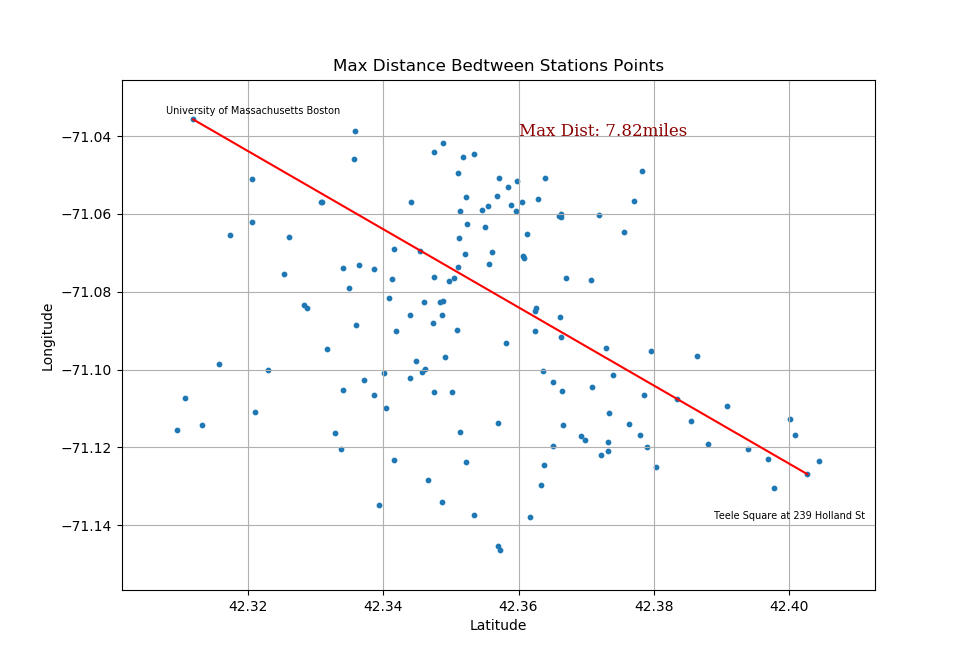

The max distance bedtween points is: 7.82 miles
The Points of max distance are :  [(42.311819, -71.03570500000001), (42.402763, -71.126908)]


In [137]:
#np array of lat and lng
np_lat_lgn = np.array(hubway_stations.loc[:, ['lat', 'lng']])

#List to store the distance bedtween points and max distance
distance_bedtween_points = []
max_distance_bedtween_points = []

count_one_time = True

#Here we search for the distance
for i in range(len(np_lat_lgn)):
    
    for j in range(len(np_lat_lgn)):
        #we conver into a tuples the value from our array of lat_long
        p1 = tuple(np_lat_lgn[i]) 
        p2 = tuple(np_lat_lgn[j])
        
        #append into a list the distance bedtween points
        distance_bedtween_points.append(distance.distance(p1, p2).miles)
        
        #we know that the distance max is 7.823097359371784
        #so now, we wan to store the points of lat, lng of that value

        if (distance.distance(p1, p2).miles == 7.823097359371784) & (count_one_time):
            max_distance_bedtween_points.append(p1)
            max_distance_bedtween_points.append(p2)
            count_one_time = False

#Get the distance bedtween points and store in pt1 and pt2
pt1, pt2 = list(max_distance_bedtween_points[0]), list(max_distance_bedtween_points[1]) 

#with the points, get the name of the station
station1_name = hubway_stations.loc[hubway_stations.lat == pt1[0]][['station']]
station2_name = hubway_stations.loc[hubway_stations.lat == pt2[0]][['station']]

#store the names into a np array
names = np.append(station1_name, station2_name)

#round the max distance bedtween points
max_distance = round(np.amax(distance_bedtween_points),2)

#for style of our plot
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }

plt.scatter(hubway_stations.lat, hubway_stations.lng, s = 10)
plt.text(pt1[0] - 0.0040, pt1[1] + 0.0015, names[0], fontsize=7)
plt.text(pt2[0] - 0.0140, pt2[1] - 0.0115, names[1], fontsize=7)
plt.text(42.36, -71.04, 'Max Dist: ' + str(max_distance) + "miles", fontdict=font)
plt.grid(True)
plt.plot([pt1[0],pt2[0]], [pt1[1], pt2[1]], color='red')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Max Distance Bedtween Stations Points')
plt.show()


print("The max distance bedtween points is: " +  str(max_distance) + " miles")
print("The Points of max distance are : ", max_distance_bedtween_points)


### Analysis:
    
The hubway reach a distance aprox of  7.82 miles bedtween the University of Massachusetts Boston and Teele Square at 239 Holland st. We can se the poins in the plot above. Each points is a Hubway station and the red lines is wicth connect the 2 most distant points. we compare 5 points from the plot above with google maps and get aproximate the same result. 

## Which community should be the next to get Hubway stations?

### Approach:
To obtain which community should be the next to implement a hubway, we grouped the zipcode of the hubway_trip dataframe, which was 520 approximate. Then, with the uszipcode library we can get the city of those 520 zipcodes.

In the hubway_statios dataframe we can find some cities where the hubway stations are located. If we compare these cities, with the cities taken out through the zipcodes of the users, we can identify which is the city where more people come, that there is no hubway station. The city of these people may be the next one to implement a hubway stations. 

[('Boston', 23), ('New York', 8), ('Cambridge', 7), ('Providence', 7), ('Manchester', 5), ('Worcester', 4), ('Lowell', 4), ('Lynn', 4), ('Quincy', 4), ('Waltham', 4)]


<IPython.core.display.Javascript object>


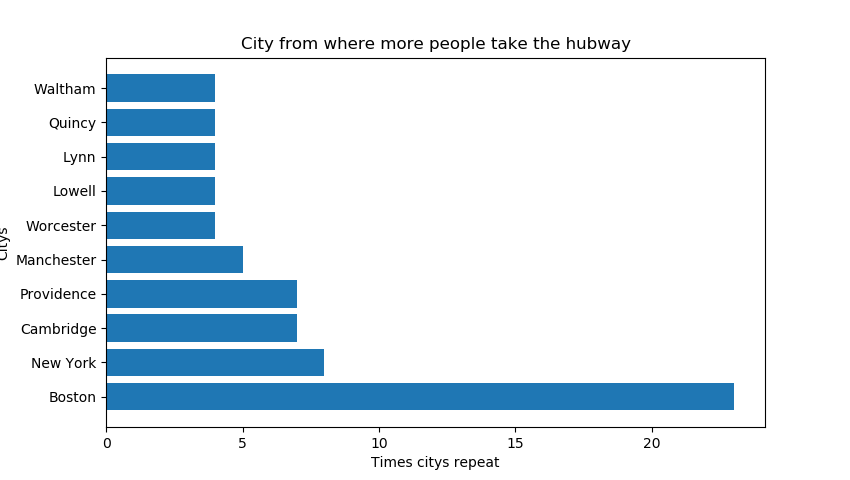

municipal
Boston        97
Brookline      5
Cambridge     28
Somerville    12
Name: terminal, dtype: int64


In [138]:
#to get the value from a set of zipcode
search = SearchEngine(simple_zipcode=False)
# Importing CSV file
File_Name = 'hubway_trips.csv'
hb_trips = pd.read_csv(File_Name)

#formart the zipcode and quit de " ' " from the string. 
hb_trips.zip_code = hb_trips.zip_code.str.slice(start=1)

#get the register people
reg = hb_trips[hb_trips['subsc_type'] == 'Registered'].copy()

#Group of zicode with how many times is repeat itself
zcode_group = reg.groupby('zip_code')['strt_statn'].count().reset_index()

#list to store the city
city = []

#populate our list city with the city from the zipcode in the dataframe
for x in zcode_group['zip_code']:
    city.append(search.by_zipcode(x).major_city)

#dictionarie to store how many times the city repeat itself
dic_citys = {}

#populate our dictionarie with how many times a city repeat itself
for key in city:
    
    if key in dic_citys.keys():
        dic_citys[key] += 1
    else:
        dic_citys[key] = 1
        
#delete the values with none key to clean our data
del dic_citys[None]

#order desc our dictionarie
dic_order_desc = sorted(dic_citys.items(), key=lambda kv: kv[1], reverse=True)

#print the 10 first values from our dic
print(dic_order_desc[:10])

#our axes
x, y = zip(*dic_order_desc[:10])
plt.barh(x, y)
# plt.xticks(x)
plt.title("City from where more people take the hubway")
plt.xlabel("Times citys repeat")
plt.ylabel("Citys")
plt.show()

#print the stations that are in the csv hubway stations
print(hubway_stations.groupby('municipal')['terminal'].count())

### Analysis:

 Which community should be the next to get Hubway stations? with the plot above, we can responst this answer. The community which shoul be the next is the New York, because we already have the community from Boston. The community of New York is one of which more registered people take the hubway. the data below the of plot show of who many stations of hubway are there by community. The Boston Community have 97 hubway station, and son on.  

# --------------------------------------------------------------------------------------------------------

## (Point 9) 
## Are all of the Hubway rentals at 2:00am by people under 25?

### Approach:

<IPython.core.display.Javascript object>


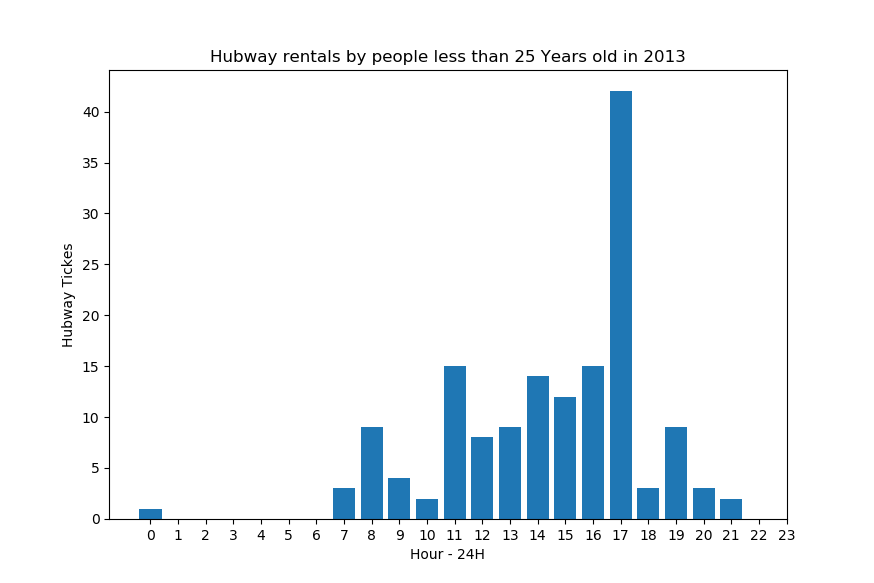

In [139]:
year_for_birthday= 2019
#create a dataframe with the data from people less than 
lest_than_25 = hubway_trips[year_for_birthday - hubway_trips['birth_date'] < 25].copy()

#cast the star_date into a datetime type
lest_than_25['start_date'] = pd.to_datetime(lest_than_25['start_date'])

#cast the column to be a string
lest_than_25['start_date'] =  lest_than_25.start_date.astype(str)

#create a column named hour with type string
lest_than_25['hour'] = lest_than_25['start_date'].str.slice(start=10, stop=13)

#cast column hour to an int
lest_than_25['hour'] =  lest_than_25['hour'].astype(int)

#group hour by tickest
rentals_by_hour = lest_than_25.groupby('hour')['hubway_id'].count().reset_index()

#PLOT
plt.bar(rentals_by_hour['hour'], rentals_by_hour['hubway_id'])
plt.xlabel("Hour - 24H")
plt.ylabel("Hubway Tickes")
plt.title("Hubway rentals by people less than 25 Years old in 2013")
plt.xticks(range(0, 24))
plt.show()


### Analysis:

Are all of the Hubway rentals at 2:00 am by people under 25? Really not. In the Plot above we can see that from 1am to 6am there are no bike rentals for people under 25 years. In the plot we can observe that the income activity for this type of people starts from 7am onwards, with a large increase in afternoon hours (PM). 

With this we can conclude that people under 25 only rent bikes at certain times of the day and that from 1am to 7am there is no rental activity.

WE ARE ASSUMING YEAR AS 2019. SO, DATA MAY CHANGE IF WE SELECT THE YEAR TO 2013, when this project was made it.  

-----------------------------------------------------------------------------------------------

## (Point 10)
## Are there different top stations for male vs. female Hubway members?

### Approach:

The approach taken was separating both registered members genders into two different data frames. After doing so, using the ‘groupby()’ method to find the frequencies of each station for por data frame. Finaling plotting both dataframes in bar graphs.

   Stations  Frequencies
0       3.0         5207
1       4.0        10074
2       5.0         5751
3       6.0        12406
4       7.0         4586
   Stations  Frequencies
0       3.0         1894
1       4.0         3102
2       5.0         1557
3       6.0         4205
4       7.0         1266


<IPython.core.display.Javascript object>


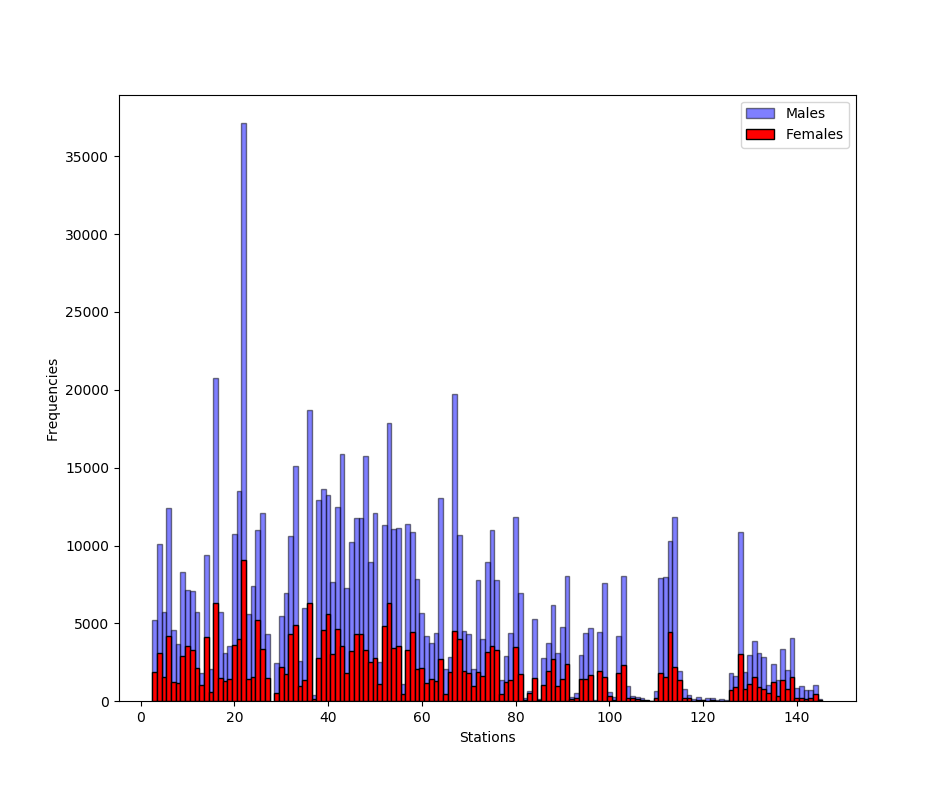

In [140]:
# Gathering all Male members
trips_Male = hubway_trips[(hubway_trips['gender'] == 'Male')
                          & (hubway_trips['subsc_type'] == 'Registered')]

# Gathering all Female members
trips_Female = hubway_trips[(hubway_trips['gender'] == 'Female') 
                            & (hubway_trips['subsc_type'] == 'Registered')]

# Finding Most Populars Stations visited by male members
most_pop_male = trips_Male.groupby('strt_statn').size()

most_pop_male = most_pop_male.reset_index()
most_pop_male.columns = ['Stations', 'Frequencies']
print(most_pop_male.head())

# Finding Most Populars Stations visited by females members
most_pop_female = trips_Female.groupby('strt_statn').size()

most_pop_female = most_pop_female.reset_index()
most_pop_female.columns = ['Stations', 'Frequencies']
print(most_pop_female.head())

# Plotting a Bar Graph for most_pop_male
plt.bar(most_pop_male['Stations'], most_pop_male['Frequencies'], label= 'Males',
        width= 1, color= 'blue', alpha= 0.5, edgecolor= 'black')

plt.bar(most_pop_female['Stations'], most_pop_female['Frequencies'], label= 'Females',
        width= 1, color= 'red', edgecolor='black')
plt.legend(loc = 'upper right')
plt.xlabel('Stations')
plt.ylabel('Frequencies')
plt.show()

### Analysis:    
    
Using a bar graph it is very clear to see that most of the stations with high popularity for males (Violet Bars) are the same station with high popularity for females (Red Bars) too. Answering the question, there aro no different top stations between both genders.